In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [2]:
FILENAME = 'segment01-bubble-movement'

# Read file 
raw_bubble_table = pd.read_pickle(FILENAME)
bubble_table = raw_bubble_table.copy()

## Get number of tracked frames for each bubble.

In [10]:
def return_length(x):
    return x.shape[0]
    
bubble_table['tracked_frames'] = bubble_table["centroid"].map(return_length)
move = bubble_table.loc[0, 'centroid']
print(move[1])
for x in move:
    print(x)

[1257.7755102   399.51020408]
[1257.70833333  399.70833333]
[1257.7755102   399.51020408]


## Bubble movement field in original picture

In [23]:
spatial_interval = 20       # unit: px
frame_width = 1280
frame_height = 720
x = np.arange(0, frame_width, spatial_interval)
y = np.arange(0, frame_height, spatial_interval)
X, Y = np.meshgrid(x, y)
move_u = np.zeros(X.shape)          # horizontal movement
move_v = np.zeros(Y.shape)          # vertical movement
add_count = np.zeros(move_u.shape)       # record data added time

for bubble_id, bubble in bubble_table.iterrows():
    bubble_movement = bubble.centroid
    for i in range(bubble_movement.shape[0]-1):
        x_id = np.where(x <= bubble_movement[i, 0])[-1][-1]
        y_id = np.where(y <= bubble_movement[i, 1])[-1][-1]
        move_u[x_id, y_id] += (bubble_movement[i+1, 0] - bubble_movement[i, 0])
        move_v[x_id, y_id] += (bubble_movement[i+1, 1] - bubble_movement[i, 1])
        add_count[x_id, y_id] += 1

# compute average movement 
move_u_avg = move_u / bubble_table.shape[0]
move_v_avg = move_v / bubble_table.shape[0]

move_u_freqavg = move_u / add_count
move_v_freqavg = move_v / add_count

IndexError: index 62 is out of bounds for axis 0 with size 36

ValueError: Argument U has a size 921600 which does not match 2304, the number of arrow positions

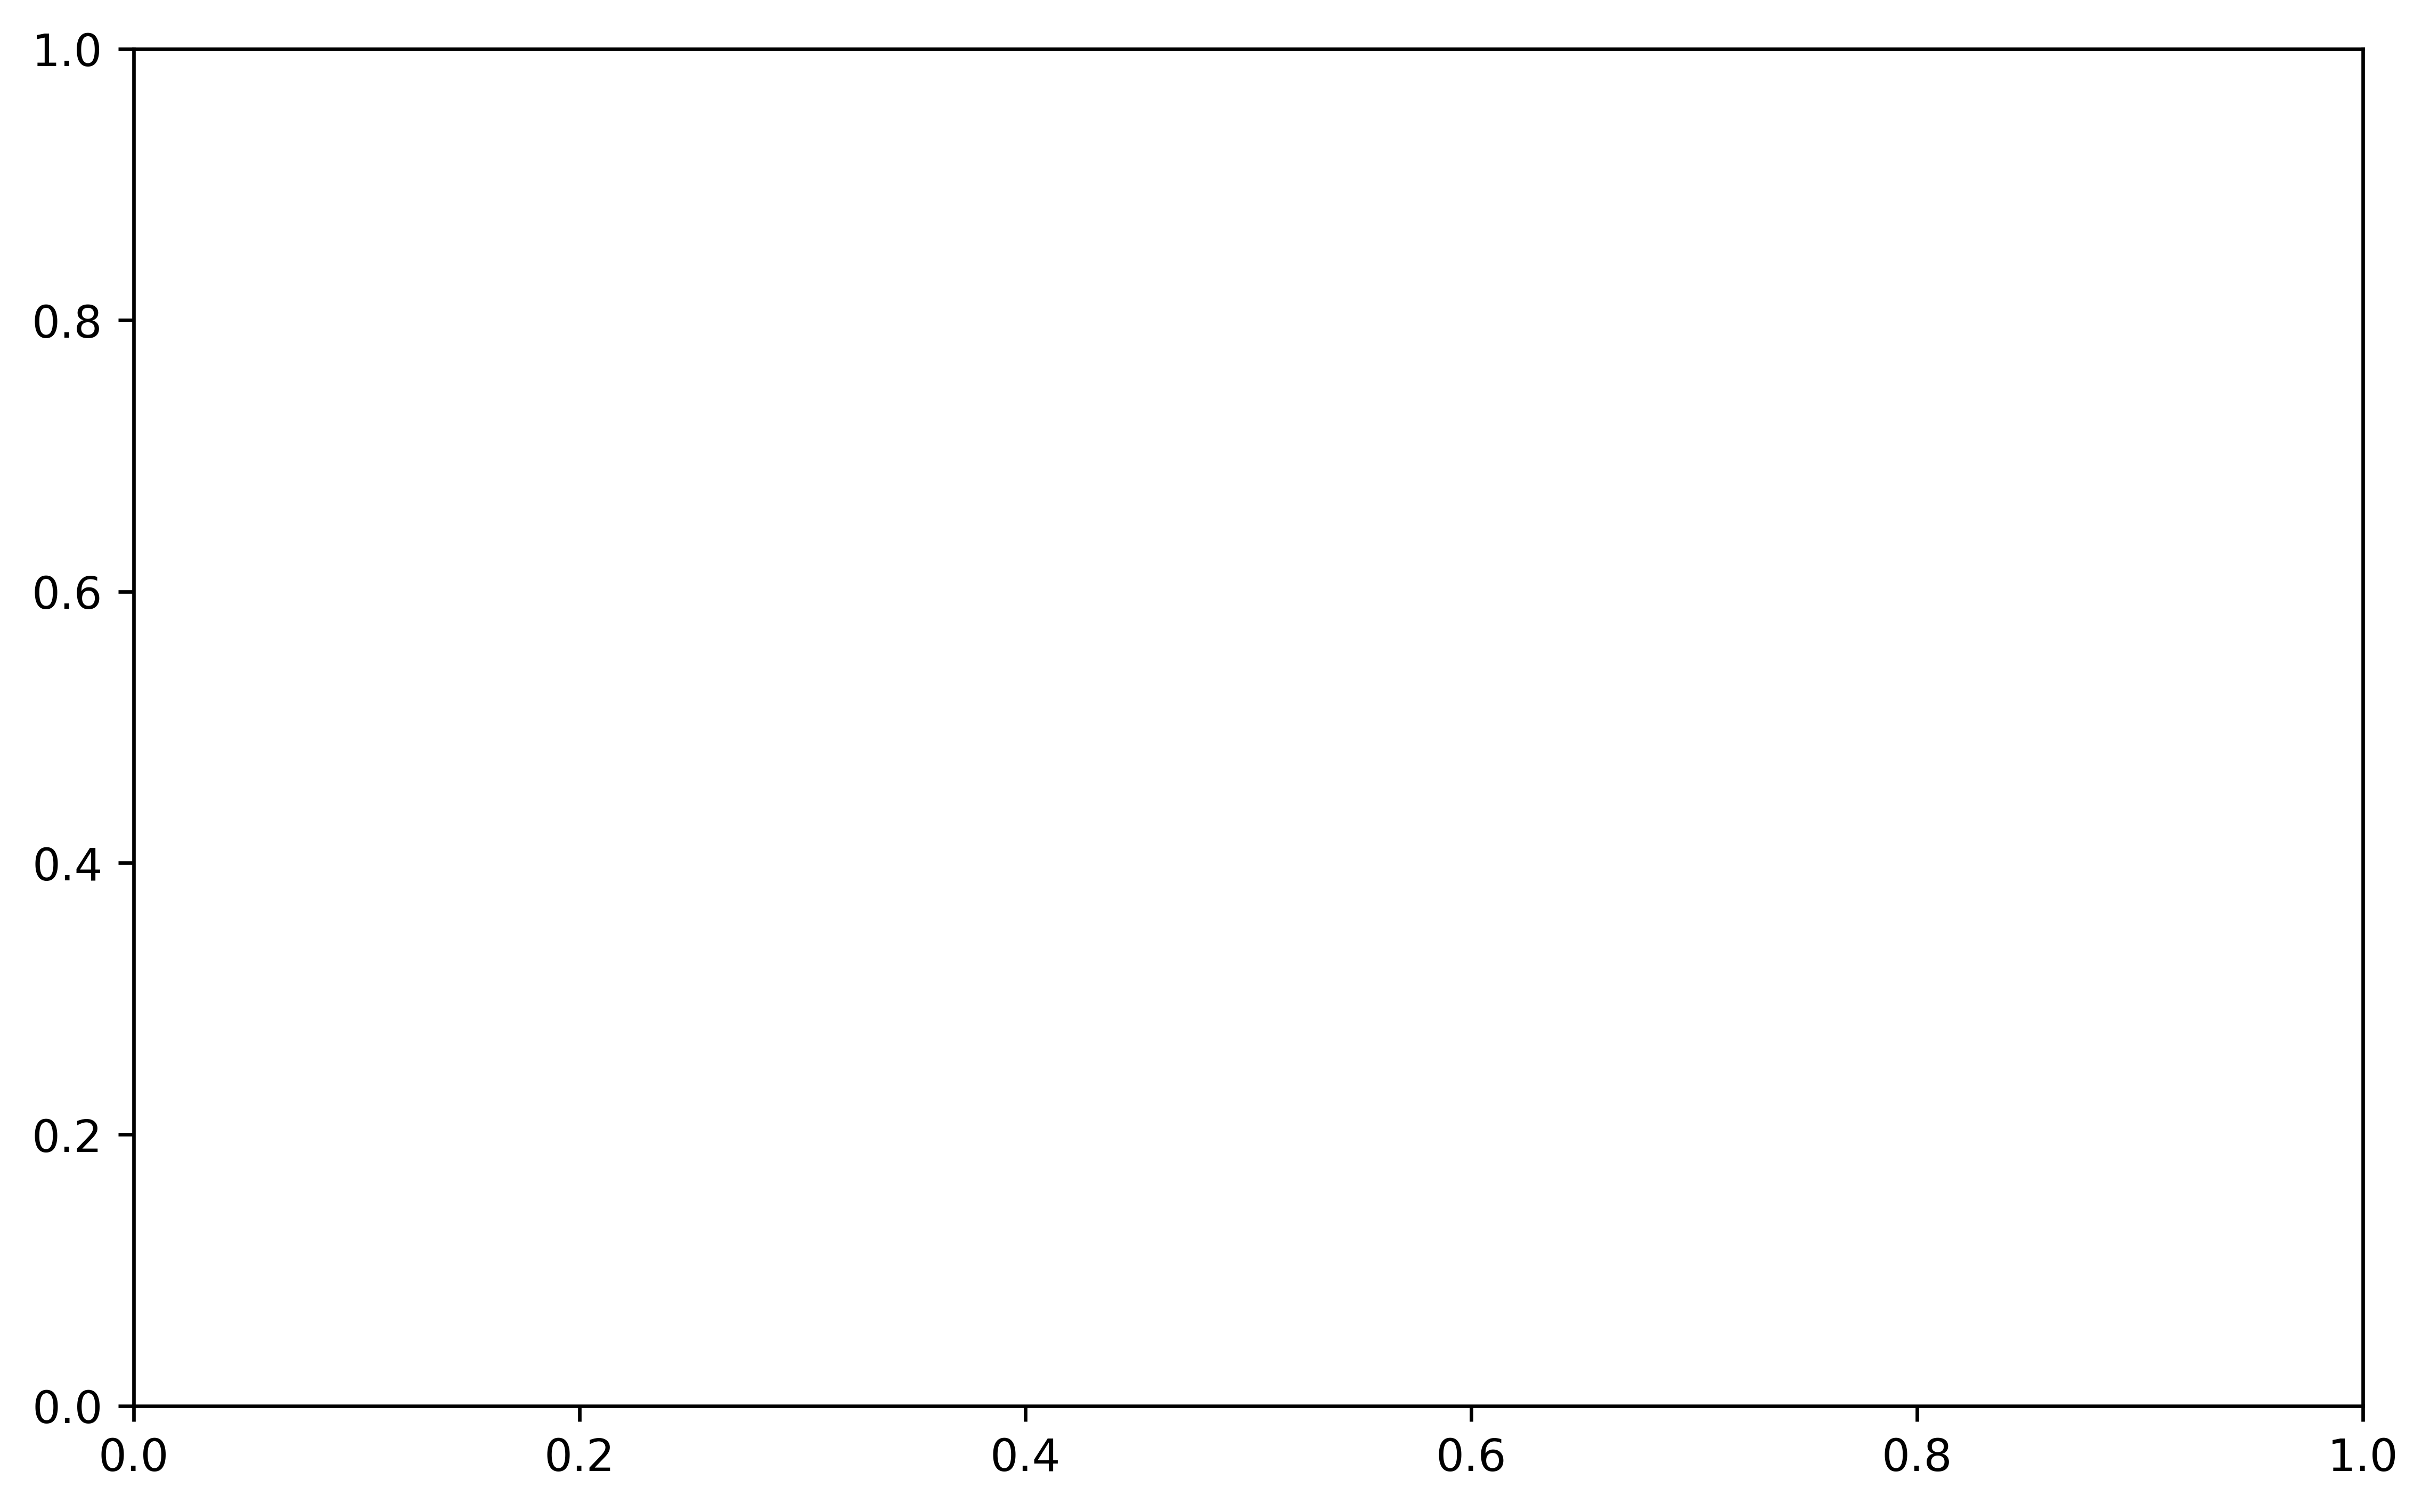

In [22]:
fig = plt.figure(figsize=(9, 9*10/16), dpi=600)
plt.quiver(X, Y, move_u, move_v)

## Bubble movement track versus bubble radius